In [35]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from keras import losses

In [36]:
#load data and set index
df = pd.read_csv('beijing.csv',infer_datetime_format=True)
df.set_index(inplace=True, keys=['date'])
df = df.drop(['district_id'],axis=1)

In [37]:
#show the dataset
df.head(5)

,feel_temperature,temperature,weather,wind_direction,wind_power,humidity,precipitation,press,visibility,cloud
date,,,,,,,,,,
2018-03-01 22:00:00,-7,2,100,173,10,20,0.0,1017,10,0
2018-03-01 23:00:00,-8,1,100,189,10,27,0.0,1016,10,0
2018-03-02 00:00:00,-9,0,100,252,10,31,0.0,1016,10,0
2018-03-02 01:00:00,-9,0,100,189,10,31,0.0,1015,10,0
2018-03-02 02:00:00,-7,0,100,179,7,29,0.0,1015,10,0


In [38]:
print(df.shape)

(14171, 10)


In [39]:
#preparation for the dataset
def get_date_str(x, formate='%Y-%m-%d %H:%M:%S'):
    return x.strftime(formate)
start = datetime(2018, 3, 3, 0, 0, 0)
start = get_date_str(start)
end = datetime(2018, 8, 30, 23, 0, 0)
end = get_date_str(end)
df = df.loc[start:end]
print(df.shape)

(4345, 10)


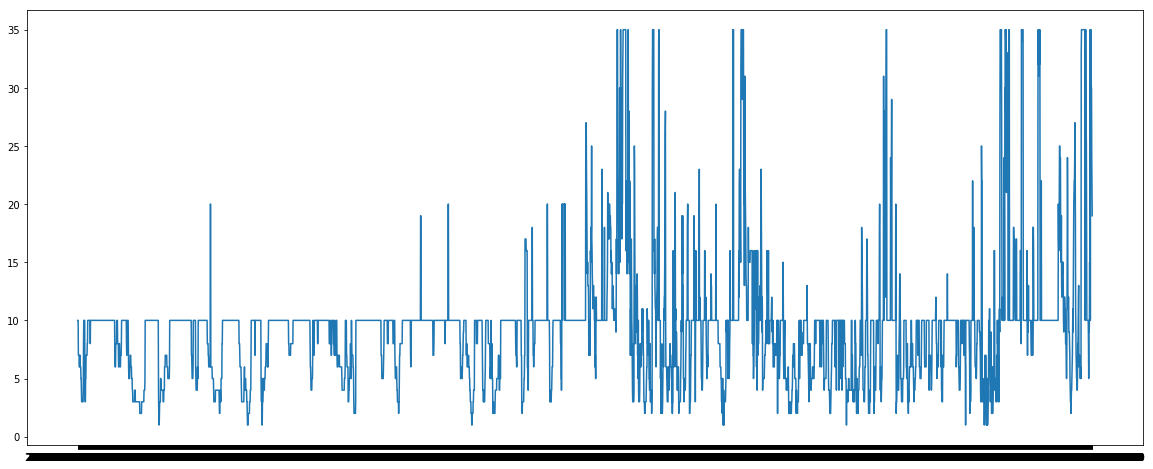

In [10]:
#show the trend of "visibility"
plt.figure(figsize=(20, 8)) 
plt.plot(df['visibility']) 
plt.show()

In [40]:
#preparation for the train dataset and test dataset
time_stamp = 24
train = df[0:4321+time_stamp]
test = df[4321-time_stamp:]
print(train.shape)
print(test.shape)

(4345, 10)
(48, 10)


In [41]:
#set feature_range=(-1,1)
scaler = MinMaxScaler(feature_range=(-1,1))
#scale the train data
scaled_data = scaler.fit_transform(train)
x_train = []
y_train = []
print(scaled_data.shape)
print(scaled_data[0,8])

for i in range(time_stamp,len(train)):
    x_train.append(scaled_data[i-time_stamp:i])
    y_train.append(scaled_data[i,8])
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(4345, 10)
-0.47058823529411764
(4321, 24, 10)
(4321,)


In [42]:
#scale the test data
scaled_data = scaler.fit_transform(test)
x_test = []
y_test = []
print(scaled_data.shape)
print(scaled_data[0,8])

for i in range(time_stamp,len(test)):
    x_test.append(scaled_data[i-time_stamp:i])
    y_test.append(scaled_data[i,8])

x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(48, 10)
0.8666666666666669
(24, 24, 10)
(24,)


In [17]:
#choose model to predict
cell_type = 'LSTM'

In [21]:
#set hyperparameters
epochs = 30
batch_size = 32

In [22]:
model = Sequential()
if cell_type == 'LSTM':
    model.add(LSTM(units=100, return_sequences=True, input_dim=x_train.shape[-1], input_length=x_train.shape[1]))
    model.add(LSTM(units=50))
if cell_type == 'GRU':
    model.add(GRU(units=100, return_sequences=True, input_dim=x_train.shape[-1], input_length=x_train.shape[1]))
    model.add(GRU(units=50))
if cell_type == 'RNN':
    model.add(SimpleRNN(units=100, return_sequences=True, input_dim=x_train.shape[-1], input_length=x_train.shape[1]))
    model.add(SimpleRNN(units=50))
#model.add(keras.layers.Dropout(rate=0.2)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=100, return_sequences=True, input_shape=(24, 10))`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/30
4321/4321 [==============================] - 4s 1ms/step - loss: 0.0703
Epoch 2/30
4321/4321 [==============================] - 5s 1ms/step - loss: 0.0410
Epoch 3/30
4321/4321 [==============================] - 5s 1ms/step - loss: 0.0327
Epoch 4/30
4321/4321 [==============================] - 5s 1ms/step - loss: 0.0298
Epoch 5/30
4321/4321 [==============================] - 5s 1ms/step - loss: 0.0290
Epoch 6/30
4321/4321 [==============================] - 6s 1ms/step - loss: 0.0284
Epoch 7/30
4321/4321 [==============================] - 5s 1ms/step - loss: 0.0400
Epoch 8/30
4321/4321 [==============================] - 5s 1ms/step - loss: 0.0284
Epoch 9/30
4321/4321 [==============================] - 5s 1ms/step - loss: 0.0275
Epoch 10/30
4321/4321 [==============================] - 5s 1ms/step - loss: 0.0275
Epoch 11/30
4321/4321 [==============================] - 5s 1ms/step - loss: 0.0270
Epoch 12/30
4321/4321 [==============================] - 5s 1ms/step - loss: 0.0269
E

In [43]:
#inverse_transform
vis = model.predict(x_test)

scaler.fit_transform(pd.DataFrame(test['visibility'].values))

vis = scaler.inverse_transform(vis)
y_test = scaler.inverse_transform([y_test])

rmse = np.sqrt(np.mean(np.power((y_test - vis),2)))
print(rmse)

13.340243762807566
